In [88]:
# Data source:
# https://www.kaggle.com/smeschke/four-shapes

In [89]:
import os
import cv2
import matplotlib.pyplot as plt, numpy as np, seaborn as sns
%matplotlib inline
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
print("Libs Loaded")

Libs Loaded


In [90]:
# PATH = r'C:/Users/szymo/PycharmProjects/shapeRecognition/shapes' # dataset file path
# IMG_SIZE = 64 # every shape image is in resolution 64x64
# shapes = ["circle", "square", "triangle", "star"] # all tipes of shapes
# labels = [] # 0-circle, 1-square, 2-triangle, 3-star
# dataset = [] # description for single image

PATH = r'C:\Users\szymo\PycharmProjects\shapeRecognition\shapes'
IMG_SIZE = 64
shapes = ["circle", "square", "triangle", "star"]
labels = []
dataset = []

In [92]:
# From kernel: https://www.kaggle.com/smeschke/load-data
for shape in shapes:
    print("Getting data for: ", shape)
    #iterate through each file in the folder
    dirs = os.listdir(PATH + "\\" + shape)
    for file in dirs:
        #add the image to the list of images
        final_path = PATH + "\\" + shape + "\\" + file
        image = cv2.imread(final_path)
        if image is None:
            print('Wrong path: ', final_path)
            break
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        image = image.reshape(12288)
        dataset.append(image)
        labels.append(shapes.index(shape))
print("Dataset loaded to model directory.")

Getting data for:  circle
Getting data for:  square
Getting data for:  triangle
Getting data for:  star
Dataset loaded to model directory.


[ 3288  9848 18325   489  8352 26823  5443 12985 21730 29775]


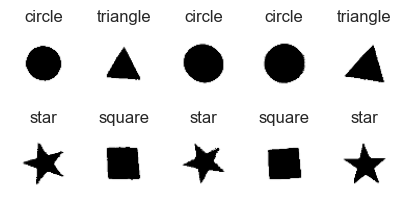

In [97]:
index = np.random.randint(0, len(dataset) - 1, size = 10) # size of list, NO of elems
print(index) # list
plt.figure(figsize=(5,5))

for i, ind in enumerate(index, 1): # The enumerate() method adds a counter to an iterable and returns it (the enumerate object).
    img = dataset[ind].reshape((64, 64, 3))
    lab = shapes[labels[ind]]
    plt.subplot(4, 5, i)
    plt.title(lab)
    plt.axis('off')
    plt.imshow(img)

In [98]:
X = np.array(dataset)
X

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [99]:
X.shape

(29940, 12288)

In [102]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [100]:
y = np.array(labels)
y

array([0, 0, 0, ..., 3, 3, 3])

In [101]:
y.shape

(29940,)

In [104]:
# scaler = StandardScaler()
# scaler.fit(X)

NameError: name 'StandardScaler' is not defined

In [ ]:
# X_std = scaler.transform(X)
# X_std

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [108]:
perceptron = Perceptron(eta0=0.01, max_iter=100, shuffle=True)
perceptron.fit(X_train, y_train)
print("Training done")

Training done


In [109]:
perceptron.score(X_test, y_test)

0.9994433311066577

In [110]:
y_pred = perceptron.predict(X_test)
y_pred

In [112]:
bad_results = [(a,b,c) for (a,b,c) in zip(X_test[y_test != y_pred],
                                          y_test[y_test != y_pred],
                                          y_pred[y_test != y_pred] )]
len(bad_results)

5

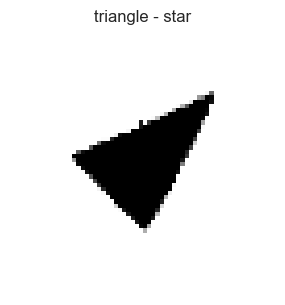

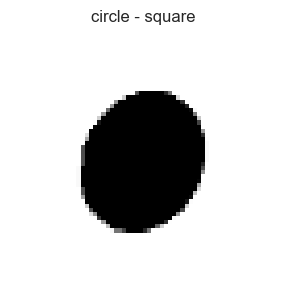

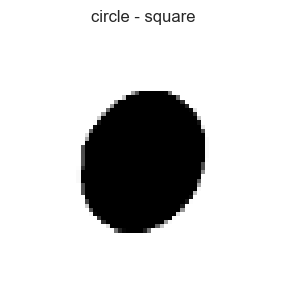

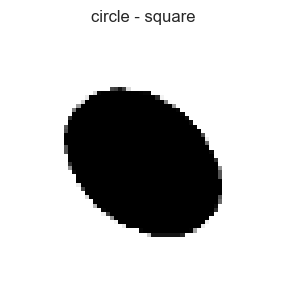

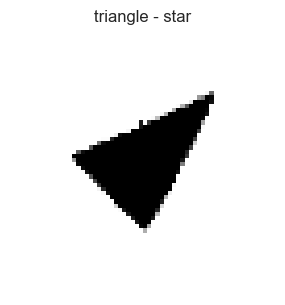

In [113]:
i=1
for x_test, y_test, y_pred1 in bad_results:
    img = x_test.reshape((64, 64, 3))
    label_test = shapes[y_test]
    label_pred = shapes[y_pred1]
    plt.figure(figsize=(20,20))
    plt.subplot(len(bad_results), 1, i)
    plt.title(label_test +' - '+ label_pred)
    plt.axis('off')
    plt.imshow(img)
    i+=1

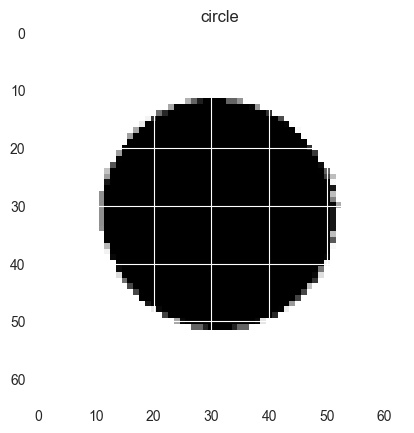

In [114]:
idx = randint(0,y_pred.size)
plt.title(shapes[y_pred[idx]])
plt.imshow(X_test[idx].reshape((64,64,3)))

In [ ]:
# Simple model done